# Assignment 8

#### Problem 1.1

We will investigate the following numerical methods for estimating integrals: Simpson, adaptive trapezoid, and traditional trapezoid.

Both the trapezoid and Simpson methods divide the x-range over which a function is integrated into subdivisions. To use both method, you have to specify the number of subdivisions you want beforehand. The trapezoid method uses a trapezoid to evaluate the area within each subdivision and then add them up. In contrast, the Simpson method uses a polynomial to match the shape of the curve, and evaluate the area within each subdivision, as a result, we expect the Simpson method to give us more accurate result. The adaptive trapezoid method uses the same approach as the traditional trapezoid method, but instead of specifying the number of subdivisions beforehand, you specify a level of accuracy you want, and the adaptive method will divide the x-range into more and more subdivisions until that level of accuracy is reached. 

Let's see them in action.

First of all, I want to enable linting. I typed the following commands:

%load_ext pycodestyle_magic
%pycodestyle_o

But there is an error: "pycodestyle module not found".

Turns out, pycodestyle_magic module has not been installed yet. So I installed pycodestyle_magic first with: 

%pip install pycodestyle_magic

And I ran the command again. There is another error: "flake8 module not found".

So, in order to enable linting, I need to install both modules, flake8 and pycodestyle_magic.

I did so, and I could enable linting finally as shown below. :)

In [2]:
%pip install flake8 pycodestyle_magic

     |████████████████████████████████| 64 kB 460 kB/s             
     |████████████████████████████████| 69 kB 1.3 MB/s             
Note: you may need to restart the kernel to use updated packages.


In [2]:
# This is to enable linting, making sure we write our python code in style.
%load_ext pycodestyle_magic
%pycodestyle_on

The pycodestyle_magic extension is already loaded. To reload it, use:
  %reload_ext pycodestyle_magic


In [1]:
# I wonder if I can import all three methods in a single command?
# Apparently I can.
from integrals import adaptive_trapezoid, trapezoid, simpson

# This magical command imports both numpy and matplotlib in one go.
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [18]:
# adaptive_trapezoid(the function, lower limit, upper limit, level of accuracy, output=True or false)
# simpson(the function, lower limit, upper limit, the number of subdivisions)
# trapezoid (the function, lower limit, upper limit, the number of subdivisions)
# The above comments are too long, but they specifies the inputs.

1:80: E501 line too long (101 > 79 characters)
3:80: E501 line too long (80 > 79 characters)


We first invetigate the function $y = e^x$ in the following range [0, 10].

In [23]:
calc_e_adaptive = adaptive_trapezoid(np.exp, a=0, b=10, acc=0.5, output=True)

N = 2,  Integral = 110137.32897403359
N = 2.0,  Integral = 55810.73028252968
N = 4.0,  Integral = 32455.927412306755
N = 8.0,  Integral = 24821.354153296994
N = 16.0,  Integral = 22737.81578168463
N = 32.0,  Integral = 22204.418433198334
N = 64.0,  Integral = 22070.25849666271
N = 128.0,  Integral = 22036.667386590423
N = 256.0,  Integral = 22028.26640638897
N = 512.0,  Integral = 22026.16596105638
N = 1024.0,  Integral = 22025.64083720381


Here I specified the accuracy to be 0.5, and compared to the actual value of the integral below, indeed it's accurate to within 0.5. Five digits are correct!

In [24]:
np.exp(10)-np.exp(0)

22025.465794806718

As we explained earlier, the adaptive method tries more and more subdivisions until the level of accuracy we specified is reached. In this case it took 11 steps for it to reach that level of accuracy. For the other two methods, trapezoid and Simpson, there is really just 1 step! We specify the number of subdivisons and that's it, the methods then calculate a value for us, done. (It would probably make more sense to compare the efficiency between adaptive trapezoid and adaptive Simpson.)

In [54]:
calc_e_trapezoid = trapezoid(np.exp, 0, 10, 1024)
print(calc_e_trapezoid)

22025.640837203788


As we can see, just one step, and boom we have the answer. Here I specified the number of subdivisions to be 1024. I expected that both the adaptive and traditional trepazoid methods should give me similar results if I make the number of subdivision the same. Since they're essentially the same method. And indeed they are exactly the same answers!

In [34]:
calc_e_simpson = simpson(np.exp, 0, 10, 1024)
print(calc_e_simpson)

22025.465795919594


The Simpson method is very accurate as expected. It uses 1024 subdivisons, and it is accurate up to 6 digits. It is more accurate than the adaptive and traditional trapezoid methods, which produced accurate answers up to 5 digits. I guess the adaptive Simpson method might also be more efficient, since it can more accurately simulate the shape of the curve, so I guess it will take fewer steps for adaptive Simpson to reach the accuracy we want. But we don't have an adaptive Simpson method code to test this hypothesis yet.  

The integral we're trying to determine is plotted below:

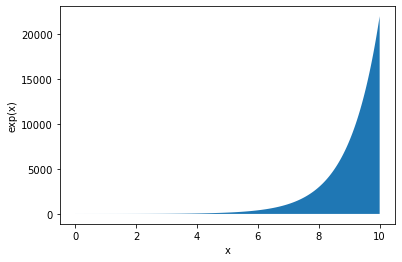

In [50]:
a = 0
b = 10
x = np.linspace(a, b, 10000)
y = np.exp(x)
plt.xlabel("x")
plt.ylabel("exp(x)")

# An integral is the area under a curve.
plt.fill_between(x, y)
plt.show()

---
Now we will try different ranges, first x = [0, 2𝜋]. The result we expect should be:

In [51]:
np.exp(2*np.pi)-np.exp(0)

534.4916555247646

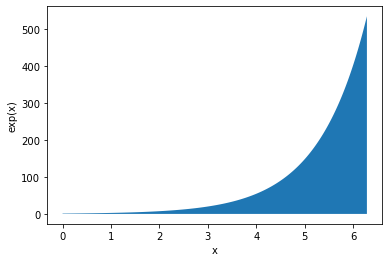

In [52]:
a = 0
b = 2*np.pi
x = np.linspace(a, b, 10000)
y = np.exp(x)
plt.xlabel("x")
plt.ylabel("exp(x)")

# An integral is the area under a curve.
plt.fill_between(x, y)
plt.show()

Next, let's do the integrals numerically.

In [53]:
calc_e_adaptive2 = adaptive_trapezoid(np.exp, a=0, b=2*np.pi, acc=0.5, output=True)

1:80: E501 line too long (83 > 79 characters)


N = 2,  Integral = 1685.4382437088263
N = 2.0,  Integral = 915.4177518285321
N = 4.0,  Integral = 640.1227136732504
N = 8.0,  Integral = 561.6883843375167
N = 16.0,  Integral = 541.3428434985228
N = 32.0,  Integral = 536.207747548939
N = 64.0,  Integral = 534.92088517879
N = 128.0,  Integral = 534.5989758648831


In [56]:
calc_e_trapezoid2 = trapezoid(np.exp, 0, 2*np.pi, 128)
print(calc_e_trapezoid2)

534.598975864883


In [57]:
calc_e_simpson2 = simpson(np.exp, 0, 2*np.pi, 128)
print(calc_e_simpson2)

534.4916727602475


Both adaptive and traditional trepazoid methods are accurate up to 3 digits, while the Simpson method is accurate up to 7 digits! 

---
Next we change the range to x = [-1. 1]. The expected result is: 

In [58]:
np.exp(1)-np.exp(-1)

2.3504023872876028

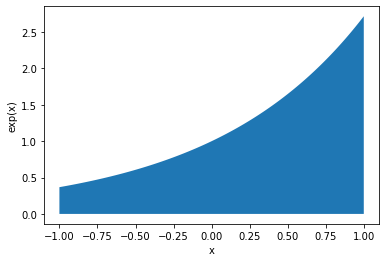

In [59]:
a = -1
b = 1
x = np.linspace(a, b, 10000)
y = np.exp(x)
plt.xlabel("x")
plt.ylabel("exp(x)")

# An integral is the area under a curve.
plt.fill_between(x, y)
plt.show()

In [61]:
calc_e_adaptive3 = adaptive_trapezoid(np.exp, a=-1, b=1, acc=0.05, output=True)

N = 2,  Integral = 3.0861612696304874
N = 2.0,  Integral = 2.5430806348152437
N = 4.0,  Integral = 2.3991662826140026
N = 8.0,  Integral = 2.36263133358521


In [62]:
calc_e_trapezoid3 = trapezoid(np.exp, -1, 1, 8)
print(calc_e_trapezoid3)

2.3626313335852105


In [63]:
calc_e_simpson3 = simpson(np.exp, -1, 1, 8)
print(calc_e_simpson3)

2.3504530172422795


The Simpson method is accurate up to 5 digits. While the trapezoid methods are accurate up to 2 digits. Here you might notice that we only used 8 subdivisions to reach the required level of accuracy. This is because the real area is quite small. Still, the Simpson method can give us surprisingly good result with so few subdivisions.

---
#### Problem 1.2

We repeat the same steps as above for a new function $y = x^3$. In the range x = [0,10], the result we expect is:

In [2]:
np.power(10, 4)/4

2500.0

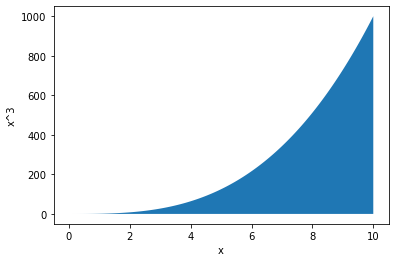

In [33]:
a = 0
b = 10
x = np.linspace(a, b, 10000)
y = np.power(x, 3)
plt.xlabel("x")
plt.ylabel("x^3")

# An integral is the area under a curve.
plt.fill_between(x, y)
plt.show()

In [6]:
# We define the function first. 
# Somehow we could't put np.power(x, 3) directly into the argument.

def f(x) :
    return np.power(x, 3)

In [5]:
calc_e_adaptive4 = adaptive_trapezoid(f, a=0, b=10, acc=0.5, output=True)

N = 2,  Integral = 5000.0
N = 2.0,  Integral = 3125.0
N = 4.0,  Integral = 2656.25
N = 8.0,  Integral = 2539.0625
N = 16.0,  Integral = 2509.765625
N = 32.0,  Integral = 2502.44140625
N = 64.0,  Integral = 2500.6103515625
N = 128.0,  Integral = 2500.152587890625


In [7]:
calc_e_trapezoid4 = trapezoid(f, 0, 10, 128)
print(calc_e_trapezoid4)

2500.152587890625


In [8]:
calc_e_simpson4 = simpson(f, 0, 10, 128)
print(calc_e_simpson4)

2500.0


The trepazoid methods are accurate up to 4 digits. The Simpson method gives us the exact answer! Initially it is surprising, but if we think about it, the Simpson method uses a polynomial to match the curve, and in this case, it can find a perfect match since the curve is a polynomial function.


---
Changing the range to x = [0, 2𝜋]. The answer we expect is:

In [9]:
np.power(np.pi*2, 4)/4

389.63636413600966

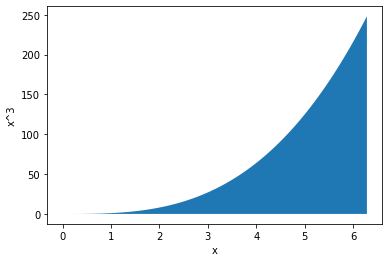

In [32]:
a = 0
b = np.pi*2
x = np.linspace(a, b, 10000)
y = np.power(x, 3)
plt.xlabel("x")
plt.ylabel("x^3")

# An integral is the area under a curve.
plt.fill_between(x, y)
plt.show()

In [11]:
calc_e_adaptive5 = adaptive_trapezoid(f, a=0, b=np.pi*2, acc=0.5, output=True)

N = 2,  Integral = 779.2727282720193
N = 2.0,  Integral = 487.04545517001213
N = 4.0,  Integral = 413.98863689451036
N = 8.0,  Integral = 395.72443232563484
N = 16.0,  Integral = 391.15838118341594
N = 32.0,  Integral = 390.01686839786123
N = 64.0,  Integral = 389.7314902014725


In [12]:
calc_e_trapezoid5 = trapezoid(f, 0, np.pi*2, 64)
print(calc_e_trapezoid5)

389.73149020147264


In [14]:
calc_e_simpson5 = simpson(f, 0, np.pi*2, 64)
print(calc_e_simpson5)

389.63636413600966


Simpson method gives exact answer. But does it always give us the exact answer when the function is a polynomial? Not necessarily, as We shall see in the next section. I don't know the reason.

The trepazoid methods are accurate up to 3 digits.

---
Changing the range to x = [-1, 1]. The answer we expect is:

In [15]:
np.power(1, 4)/4 - np.power(-1, 4)/4

0.0

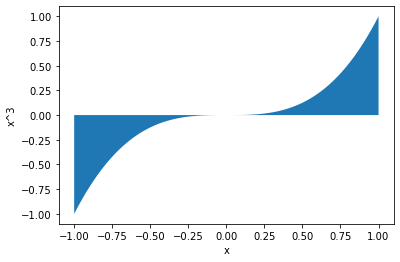

In [31]:
a = -1
b = 1
x = np.linspace(a, b, 10000)
y = np.power(x, 3)
plt.xlabel("x")
plt.ylabel("x^3")

# An integral is the area under a curve.
plt.fill_between(x, y)
plt.show()

In [18]:
calc_e_adaptive6 = adaptive_trapezoid(f, a=-1, b=1, acc=0.05, output=True)

N = 2,  Integral = 0.0
N = 2.0,  Integral = 0.0


In [24]:
calc_e_trapezoid6 = trapezoid(f, -1, 1, 2)
print(calc_e_trapezoid6)

0.0


In [25]:
calc_e_simpson6 = simpson(f, -1, 1, 2)
print(calc_e_simpson6)

0.0


All three methods are exact. But it is a coincidence I think. Because the function is odd, when N =2 for the three methods, the function is divided equally across the origin, both areas are equal in magnitude but opposite in sign. This gives us the exact answer 0. For the adaptive trepazoid method, N = 2 is a good enough attempt, it has reached the accuracy level we want. So it stops there. Let's give the traditional trepazoid and Simpson methods more subdivisions, and see what we get:

In [28]:
calc_e_trapezoid6_2 = trapezoid(f, -1, 1, 1000)
print(calc_e_trapezoid6_2)

2.842170943040401e-17


In [29]:
calc_e_simpson6_2 = simpson(f, -1, 1, 1000)
print(calc_e_simpson6_2)

0.0


The tradional trepozoid method gives a really small number, but it's not exactly zero. The Simpson method still gives an exact answer.

In [30]:
calc_e_simpson6_3 = simpson(f, -1, 1, 50)
print(calc_e_simpson6_3)

3.552713678800501e-17


But the Simpson doesn't always give us the exact answer in the case where the function is a polynomial, for example here I changed the number of subdivision to 50, and the Simpson method returns us with a really small number but it's not exactly zero. Why is it not able to give us the exact answer in this case? I don't know.

---
#### Problem 1.3

We left the most difficult part to last. We repeat the same steps as above for a new function $y = \sin{1/x}$. It's a difficult function to deal with, because the function behaves wildly when x is close to 0: we have $y = \sin{(infinity)}$ which you can think of as a function that oscillates with infinite frequency. I don't think this function even has an anti-derivative, so we don't know the exact answer we should expect. Anyway, let's give it a try. We try to plot it first.

/tmp/ipykernel_373/3282203340.py:4: RuntimeWarning: divide by zero encountered in true_divide
  y = np.sin(1/x)
/tmp/ipykernel_373/3282203340.py:4: RuntimeWarning: invalid value encountered in sin
  y = np.sin(1/x)


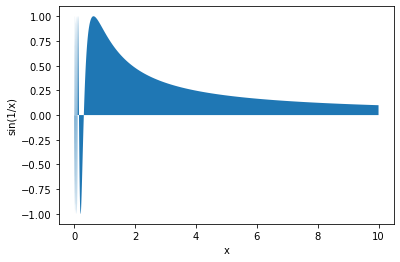

In [34]:
a = 0
b = 10
x = np.linspace(a, b, 10000)
y = np.sin(1/x)
plt.xlabel("x")
plt.ylabel("sin(1/x)")

# An integral is the area under a curve.
plt.fill_between(x, y)
plt.show()

It gets really crazy around x=0. But thankfully we can still plot it, and the program even knows we are dividing by 0 at x=0. Python is really smart.

In [35]:
def f2(x) :
    return np.sin(1/x)

In [46]:
# we can not put the initial value of x at zero, 
# It will produce error message: "dividing by zero!"
# So we give it a really small number
calc_e_adaptive7 = adaptive_trapezoid(f2, a=0.000001, b=10, acc=0.05, output=True)

N = 2,  Integral = -1.2508003025422811
N = 2.0,  Integral = 0.3679463053628617
N = 4.0,  Integral = 1.489865147088916
N = 8.0,  Integral = 2.312717836775412
N = 16.0,  Integral = 2.7814517256516798
N = 32.0,  Integral = 2.656482430311437
N = 64.0,  Integral = 2.765085182544903
N = 128.0,  Integral = 2.735209458924604


In [47]:
calc_e_trapezoid7 = trapezoid(f2, 0.000001, 10, 128)
print(calc_e_trapezoid7)

2.7352094589246017


In [49]:
calc_e_simpson7 = simpson(f2, 0.000001, 10, 128)
print(calc_e_simpson7)

2.725250884384502


I don't know which is more accurate, since I don't know the exact answer to this integral :P 

---
Changing the range to x = [0, 2𝜋]. 

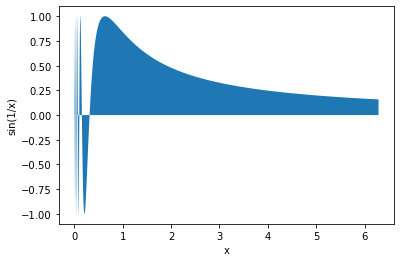

In [54]:
a = 0.000001
b = np.pi*2
x = np.linspace(a, b, 10000)
y = np.sin(1/x)
plt.xlabel("x")
plt.ylabel("sin(1/x)")

# An integral is the area under a curve.
plt.fill_between(x, y)
plt.show()

We can see more vividly the wild behavior around x=0 now as we zoomed in a little. Here we tried setting a small value for the initial value of x and avoided x = 0.

In [57]:
calc_e_adaptive8 = adaptive_trapezoid(f2, a=0.000001, b=np.pi*2, acc=0.005, output=True)

N = 2,  Integral = -0.6016451056421456
N = 2.0,  Integral = 0.6823756193588159
N = 4.0,  Integral = 1.6058326173215518
N = 8.0,  Integral = 2.2171322542692145
N = 16.0,  Integral = 2.297143775129289
N = 32.0,  Integral = 2.13531290061472
N = 64.0,  Integral = 2.1360367741400452


In [58]:
calc_e_trapezoid8 = trapezoid(f2, 0.000001, np.pi*2, 64)
print(calc_e_trapezoid8)

2.136036774140045


In [59]:
calc_e_simpson8 = simpson(f2, 0.000001, np.pi*2, 64)
print(calc_e_simpson8)

2.1362780653151536


---
Changing the range to x = [-1, 1]. 

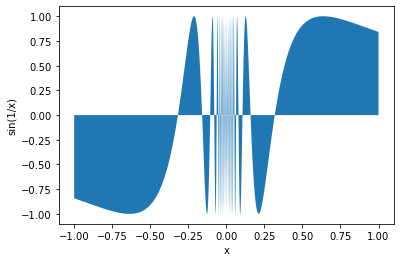

In [60]:
a = -1
b = 1
x = np.linspace(a, b, 10000)
y = np.sin(1/x)
plt.xlabel("x")
plt.ylabel("sin(1/x)")

# An integral is the area under a curve.
plt.fill_between(x, y)
plt.show()

This graph actually look nice! And we can tell it is an odd function. So the integration result we expect should be 0. And surprisingly the "divide by zero" error didn't show up this time. I don't know why. 

In [61]:
calc_e_adaptive9 = adaptive_trapezoid(f2, a=-1, b=1, acc=0.005, output=True)

N = 2,  Integral = 0.0
N = 2.0,  Integral = nan


/tmp/ipykernel_373/2878438031.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sin(1/x)
/tmp/ipykernel_373/2878438031.py:2: RuntimeWarning: invalid value encountered in sin
  return np.sin(1/x)


We can not avoid x=0 in the integration algorithm, so here is what I will do, I will divide the calculation into two parts, x = [0.000001, 1] and x = [-1, -0.000001], and add the two results together.

In [62]:
calc_e_adaptive9_1 = adaptive_trapezoid(f2, a=0.000001, b=1, acc=0.005, output=True)

N = 2,  Integral = 0.24573849557956046
N = 2.0,  Integral = 0.5775179226990026
N = 4.0,  Integral = 0.3425446938786397
N = 8.0,  Integral = 0.5907768584923015
N = 16.0,  Integral = 0.5070140071048509
N = 32.0,  Integral = 0.4909341436287946
N = 64.0,  Integral = 0.5288325970771773
N = 128.0,  Integral = 0.5177744139294383
N = 256.0,  Integral = 0.5017040173719602
N = 512.0,  Integral = 0.5090827444400221


In [63]:
calc_e_adaptive9_2 = adaptive_trapezoid(f2, a=-1, b= -0.000001, acc=0.005, output=True)

N = 2,  Integral = -0.24573849557956046
N = 2.0,  Integral = -0.5775179226990027
N = 4.0,  Integral = -0.34254469387863984
N = 8.0,  Integral = -0.5907768584923017
N = 16.0,  Integral = -0.5070140071048522
N = 32.0,  Integral = -0.4909341436287955
N = 64.0,  Integral = -0.5288325970771763
N = 128.0,  Integral = -0.5177744139294416
N = 256.0,  Integral = -0.5017040173719642
N = 512.0,  Integral = -0.5090827444400399


In [65]:
calc_e_adaptive9 = calc_e_adaptive9_1 + calc_e_adaptive9_2
print (calc_e_adaptive9)

-1.7763568394002505e-14


This is a really small number close to zero. This is what we expected.

In [67]:
calc_e_trapezoid9_1 = trapezoid(f2, 0.000001, 1, 512)
print(calc_e_trapezoid9_1)

0.5090827444400219


In [68]:
calc_e_trapezoid9_2 = trapezoid(f2, -1, -0.000001, 512)
print(calc_e_trapezoid9_2)

-0.5090827444400394


In [69]:
calc_e_trapezoid9 = calc_e_trapezoid9_1 + calc_e_trapezoid9_2
print (calc_e_trapezoid9)

-1.7541523789077473e-14


The adaptive and traditional trepazoid methods now give us different values now...why? Maybe the numbers are just too small?

In [70]:
calc_e_simpson9_1 = simpson(f2, 0.000001, 1, 512)
calc_e_simpson9_2 = simpson(f2, -1, -0.000001, 512)
calc_e_simpson9 = calc_e_simpson9_1 + calc_e_simpson9_2
print (calc_e_simpson9)

-2.19824158875781e-14


The trepazoid methods are more accurate than the Simpson method this time!